In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")
filepath

'C:\\Users\\pc hp\\housing.csv'

In [2]:
housing_data = pd.read_csv("E:\Reading Books\housing.csv")

In [21]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


There has 20,640 instances and totol_bedrooms has only 20,433 it means there has missing values 

In [10]:
# how many districts belong to each category in ocean_proximity
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


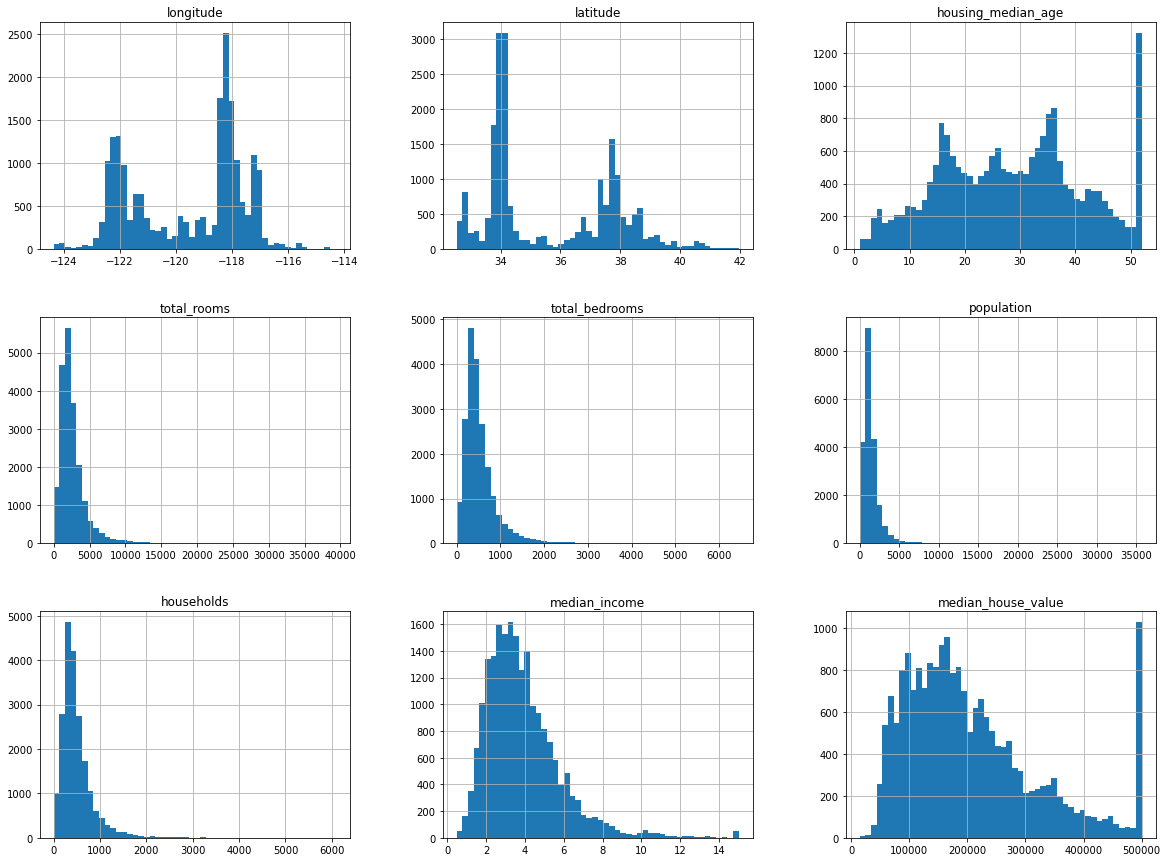

In [13]:
# plot histogram for each  numerical 
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

- The median income. Understand how the data was computed. After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).

- The housing median age and the **median house value** were also capped. This maybe a serious problem since ML algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s out‐put) to see if this is a problem or not. If they tell you that they need precise pre‐dictions even beyond $500,000, then you have mainly two options:

    a. Collect proper labels for the districts whose labels were capped.
    
    b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

- These attributes have very different scales. We will discuss this later in this chap‐ter when we explore feature scaling.

- Many histograms are **tail heavy**: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.



In [3]:
# Income distribution
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                   bins=[0.,1.5,3.0,4.5,6., np.inf],
                                   labels=[1,2,3,4,5])
housing_data['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [4]:
# Create a test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state = 42)

<AxesSubplot:>

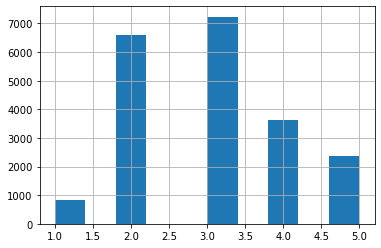

In [5]:
# create an income category attribute
housing_data['income_cat'].hist()

Most people in the middle income, there are fewer people in the richer income and lots of people in level 2 income level

In [6]:
# To ensure that the test set is representative of the various categories of incomes in the whole dataset. 
# Do stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [22]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [7]:
# Look at the income category propotions in this test set
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [8]:
housing_data['income_cat'].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [9]:
#compares the income category proportions in the overall dataset, 
##in the test set generated with stratified sampling, and in a test set generated using purelyrandom sampling
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({"Overall": income_cat_proportions(housing_data),
                             "Stratified": income_cat_proportions(strat_test_set),
                             "Random": income_cat_proportions(test_set)}).sort_index()
compare_props["Rand. %error"] = 100*compare_props["Random"]/compare_props["Overall"]-100
compare_props["Strat. %error"] = 100*compare_props["Stratified"]/compare_props["Overall"]-100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


* As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed

In [10]:
# drop income_cat
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [11]:
# creata a copy of training data
housing = strat_train_set.copy()

## Visualize

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

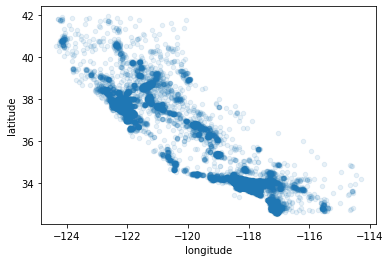

In [26]:
# visualizing geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

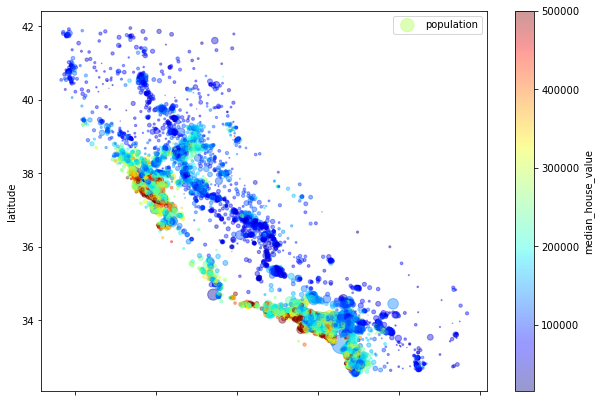

In [31]:
# look at the house prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s = housing['population']/100, label="population", figsize=(10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [9]:
# The correlation matrix
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

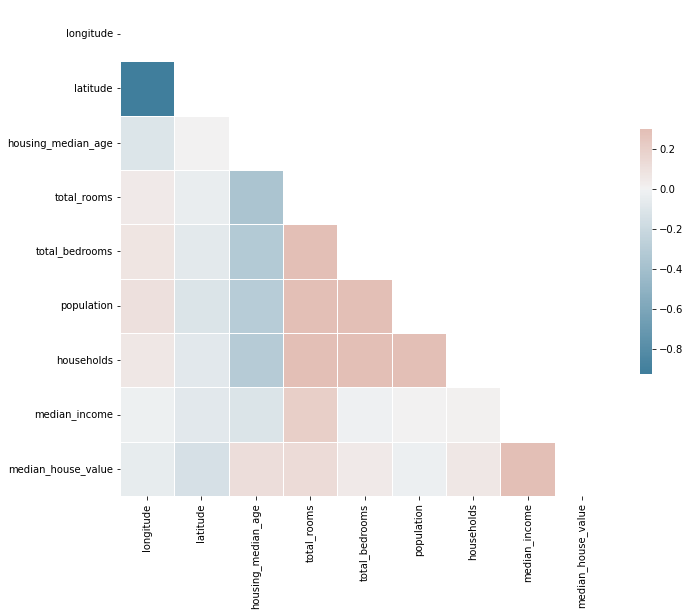

In [17]:
# Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, 
           square=True, linewidth=.5, cbar_kws={"shrink":.5})

In [13]:
# how much each attribute correlates to the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

* the median house value tends to go up when the median income goes up.
* a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).


# Prepare Data for ML algorithms

In [12]:
# look at the missing values
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,162100.0,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,405600.0,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,115800.0,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN


In [13]:
# option 1: Drop na
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [14]:
# option 2: drop the whole attribute
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [15]:
# option 3: fill na
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [14]:
# using Scikit-learn simpleimputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [15]:
# create a new dataframe without text data "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis =1)

In [16]:
# fit the imputer to the training data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05])

In [32]:
housing_num.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05])

In [17]:
# replace missing values by the learned median
X = imputer.transform(housing_num)

In [18]:
# put it to dataframe
housing_str = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
housing_str

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0
...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0


In [19]:
# encode categorical data
## look at the categorical data
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [20]:
# convert from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [22]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [23]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
# Feature Engineer
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [25]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,1.067416,3.808989,5.505618


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.12461343,
        -0.08649871, -0.31205452],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.28097679,
        -0.03353391,  0.21768338],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.15586354,
        -0.09240499, -0.46531516],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.08048715,
        -0.03055414,  0.3469342 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.06175575,
         0.06150916,  0.02499488],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0619974 ,
        -0.09586294, -0.22852947]])

### Pipelines

* Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another. There is a little bit of complexity. Instead we'll just create our own version of a pipeline using a normal Python function.

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):
    
    ### Separate labels if they exist 
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None
        
    ### Feature Engineering
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # creating a list of our features for future use
    
    ### Imputing Data
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)
    
    ### Encoding Categorical Data
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # we're encoding this, we dont need it in our list anymore
    
    ### Scaling Numerical Data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    ### Concatening all Data
    output = np.hstack([housing_scaled, housing_cat_1hot])
    
    return output, labels, features

# Select and Train a Model

### Transform our data using the "pipeline" we created

* we now need to create a clean training dataset to train our ML regressors and a test set to test the accuracy of said regressors. Let's input our stratifed sample into our pipeline

In [33]:
train_data, train_labels, features = data_transformations(strat_train_set)

In [36]:
train_data
features
train_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [37]:
test_data, test_labels, features = data_transformations(strat_test_set)

In [39]:
test_data
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [45]:
# Compare against some test data
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, 
                                         "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421413.363329,78587.636671
10970,240300.0,260227.976280,-19927.976280
20351,218200.0,226814.811944,-8614.811944
6568,182100.0,202785.858376,-20685.858376
13285,121300.0,165947.558618,-44647.558618


In [46]:
# Mean Square Error
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

42587.94451069394

In [47]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(orginal_values, predicted_values)
lin_mae

34492.76837769454

## Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [49]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # sign of overfitting

0.0

## Cross Validation

* It seems our perfromance above was top notch. Instead of just splitting our data into a train and test set ad training once, we can do something called **K_Fold Cross-validation** which will split our training dataset into k (10) folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.

* Cross-validation can be a good way to train data multiple times on a small dataset

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, 
                        scoring="neg_mean_squared_error", cv =10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [71651.73681115 68908.88378904 69837.95849446 74273.12571063
 70569.16041628 74723.14094394 70439.52867477 69259.50811177
 78240.7656732  69561.76956763]
Mean: 71746.55781928787
Standard deviation: 2884.0209802819504


## Random Forest Regressor

* Is basically a bunch of decision tree regressors

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [54]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18678.183211366006

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49754.35067065 47346.47090242 50117.76189514 52857.98783162
 49610.47368883 53551.91042057 49107.02232839 47840.95359996
 53363.70234564 50520.06375328]
Mean: 50407.06974365081
Standard deviation: 2084.1812169852983


In [58]:
scores = cross_val_score(lin_reg, train_data, train_labels,
                        scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69181.077598
std       2873.435264
min      65040.039275
25%      67422.917056
50%      68286.575870
75%      70953.770562
max      74628.435067
dtype: float64

# Fine-Tuning the Model

* After you pick a model or set of models that are promissing, you'll need to fine-tune the hyperparameters (parameters of the model that aren't affected by training) in order to find the best ones to use for your model. you can use something called Grid Search in order to accomplish this.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid= [
    ## try 12 (3x4) combination of hyperparameters
    {'n_estimators':[3,10,30], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
## train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64796.29671399816 {'max_features': 2, 'n_estimators': 3}
55775.16268850132 {'max_features': 2, 'n_estimators': 10}
53249.85197335964 {'max_features': 2, 'n_estimators': 30}
60370.02057077557 {'max_features': 3, 'n_estimators': 3}
53769.649778535044 {'max_features': 3, 'n_estimators': 10}
51363.077829575326 {'max_features': 3, 'n_estimators': 30}
61138.14355385365 {'max_features': 4, 'n_estimators': 3}
52863.07424277029 {'max_features': 4, 'n_estimators': 10}
50407.76890205031 {'max_features': 4, 'n_estimators': 30}


In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103523,0.014730,0.005988,0.001546,2,3,"{'max_features': 2, 'n_estimators': 3}",-4.033145e+09,-4.216802e+09,-4.307067e+09,...,-4.198560e+09,9.656402e+07,9,-1.156359e+09,-1.086126e+09,-1.179434e+09,-1.232901e+09,-1.122620e+09,-1.155488e+09,4.991685e+07
1,0.443975,0.127702,0.018158,0.003356,2,10,"{'max_features': 2, 'n_estimators': 10}",-2.850059e+09,-3.263461e+09,-3.201017e+09,...,-3.110869e+09,1.534865e+08,6,-5.897121e+08,-5.684097e+08,-5.849390e+08,-5.899852e+08,-5.746099e+08,-5.815312e+08,8.603367e+06
2,1.154025,0.114795,0.055639,0.006051,2,30,"{'max_features': 2, 'n_estimators': 30}",-2.600753e+09,-2.982751e+09,-2.934385e+09,...,-2.835547e+09,1.754162e+08,4,-4.469698e+08,-4.340389e+08,-4.381881e+08,-4.418626e+08,-4.265185e+08,-4.375156e+08,6.953489e+06
3,0.133844,0.005791,0.006962,0.000619,3,3,"{'max_features': 3, 'n_estimators': 3}",-3.489880e+09,-3.859427e+09,-3.613079e+09,...,-3.644539e+09,1.244898e+08,7,-1.013762e+09,-1.018425e+09,-9.158114e+08,-1.015483e+09,-1.003711e+09,-9.934384e+08,3.912755e+07
4,0.496864,0.047842,0.021131,0.001923,3,10,"{'max_features': 3, 'n_estimators': 10}",-2.770215e+09,-2.992311e+09,-3.029781e+09,...,-2.891175e+09,1.130293e+08,5,-5.447393e+08,-5.371876e+08,-5.324940e+08,-5.572024e+08,-5.298395e+08,-5.402926e+08,9.853341e+06
5,1.463804,0.114095,0.049641,0.003554,3,30,"{'max_features': 3, 'n_estimators': 30}",-2.469814e+09,-2.763263e+09,-2.724848e+09,...,-2.638166e+09,1.173646e+08,2,-4.073680e+08,-4.036401e+08,-4.062192e+08,-4.224746e+08,-4.008993e+08,-4.081202e+08,7.515859e+06
6,0.171039,0.013946,0.006378,0.001495,4,3,"{'max_features': 4, 'n_estimators': 3}",-3.415646e+09,-3.800466e+09,-3.907482e+09,...,-3.737873e+09,1.708007e+08,8,-9.841236e+08,-9.532705e+08,-1.042962e+09,-1.060888e+09,-9.435309e+08,-9.969549e+08,4.718291e+07
7,0.555999,0.037317,0.017563,0.001756,4,10,"{'max_features': 4, 'n_estimators': 10}",-2.659842e+09,-2.874472e+09,-2.820861e+09,...,-2.794505e+09,8.887037e+07,3,-5.230004e+08,-5.096829e+08,-5.065158e+08,-5.372295e+08,-5.064914e+08,-5.165840e+08,1.198549e+07
8,1.801317,0.108059,0.075406,0.032192,4,30,"{'max_features': 4, 'n_estimators': 30}",-2.381173e+09,-2.618105e+09,-2.621105e+09,...,-2.540943e+09,1.257149e+08,1,-3.887976e+08,-3.832867e+08,-3.850775e+08,-4.035270e+08,-3.821878e+08,-3.885753e+08,7.805208e+06


### Randomized search

* Randomized search alows you to more easily find the hyperparameters that we're interested in  because instead of searching through all posible combinations, it randomly picks a couple and tries those out.

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028E67A6AFA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028E67A6AE20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [67]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48872.96730239911 {'max_features': 7, 'n_estimators': 180}
51407.61346702038 {'max_features': 5, 'n_estimators': 15}
50440.74137729941 {'max_features': 3, 'n_estimators': 72}
50715.017643468156 {'max_features': 5, 'n_estimators': 21}
48979.26226521618 {'max_features': 7, 'n_estimators': 122}
50429.11256883642 {'max_features': 3, 'n_estimators': 75}
50278.24289394691 {'max_features': 3, 'n_estimators': 88}
49215.51860219781 {'max_features': 5, 'n_estimators': 100}
50163.34567766393 {'max_features': 3, 'n_estimators': 150}
65146.55285210115 {'max_features': 5, 'n_estimators': 2}


In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.14891863e-02, 8.39717342e-02, 4.15026512e-02, 2.65129914e-02,
       2.21273995e-02, 2.56012568e-02, 2.02111261e-02, 2.84987075e-01,
       2.54486162e-02, 9.69870282e-02, 1.10471869e-01, 2.05736416e-02,
       1.33367642e-01, 5.34915732e-05, 7.28572731e-03, 9.40856371e-03])

### Feature Importance List

* Judging the importance of various featres is very important as this allows u to explain to our stakeholders which feature is most important and why. Which is becoming more important as more advaced models behave like blackboxes

In [70]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.09148918625382403),
 ('latitude', 0.0839717342444931),
 ('housing_median_age', 0.04150265124465676),
 ('total_rooms', 0.026512991442743952),
 ('total_bedrooms', 0.022127399483810536),
 ('population', 0.02560125683544751),
 ('households', 0.020211126124541408),
 ('median_income', 0.2849870746999406),
 ('bedrooms_per_household', 0.025448616181563032),
 ('population_per_household', 0.09698702824601647),
 ('rooms_per_household', 0.11047186933427157),
 ('<1H OCEAN', 0.020573641638309048),
 ('INLAND', 0.13336764167459997),
 ('ISLAND', 5.34915732154789e-05),
 ('NEAR BAY', 0.007285727308205769),
 ('NEAR OCEAN', 0.009408563714360897)]

<BarContainer object of 16 artists>

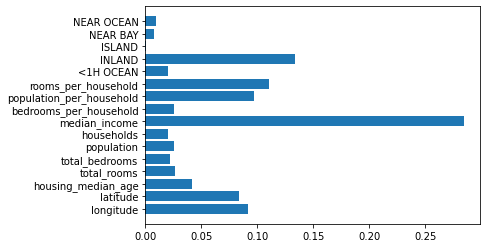

In [71]:
plt.barh(y=features, width=feature_importances.tolist())

In [72]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [73]:
final_rmse

59582.54912445898

# Summary

1. Bring the data

2. Do a little bit data analysis (data.info, data.describe, plot interesting variables we have)

3. Split our data into predictors X and our label Y => Stratified split to make sure that according to each of the splis that we have is has an a represetative distribution of the income category

4. Visualize data, create histograms, correlation matrices

5. Prepare data for Machine Learning using feature engineering, imputation, encoding categorical variables, scaling.

6. Create a pipeline

7. Machine learing: linear regression, compute mser, decisiontree, cross validation, random forest 

8. Fine tune: gridsearch cv, randomize search, important feature, final model
